# POLI JÚNIOR + TOTAL PASS
### CLUSTERIZAÇÃO PARA SEGMENTAÇÃO DE CLIENTES

### Índice:
1. Pré-processamento
2. K-Means com todas as features
3. K-Means com colunas selecionadas
4. Gráficos úteis para a análise

### Pré-processamento

Dependências Necessárias:
- pandas
- numpy
- scikit learn
- matplotlib

Instalando as dependências necessárias:

In [55]:
!pip install pandas
!pip install numpy
!pip install scikit-learn==0.24.2
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1383 lines of output]
      Partial import of sklearn during the build process.
      setup.py:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Py

Importando as bibliotecas utilizadas:

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from random import randint
from sklearn.manifold import TSNE
from scipy.stats import randint
# Evitar warnings:
import warnings
warnings.filterwarnings("ignore")

Criação de uma única base:

In [2]:
# Substitua o caminho das bases aqui:
subscriptions_features_dataset_filepath = '../Tabelas/subscriptions_features_dataset.csv'
tendencia_de_utilizacao_filepath = '../Tabelas/tendência_de_utilização.csv'
features_filepath = '../Tabelas/features.csv'

x1 = pd.read_csv(subscriptions_features_dataset_filepath)
x2 = pd.read_csv(tendencia_de_utilizacao_filepath)
x5 = pd.read_csv(features_filepath)

In [3]:
df = pd.merge(x1, x2, on='employee_id', how='inner')
df = pd.merge(df, x5, on='employee_id', how='inner')

print(df.shape)
# removendo linhas duplicadas de df
df = df.drop_duplicates(subset='employee_id', keep='first')
print(df.shape)

# Selecionar colunas para clusterização
col_cluster = ['type_mapped', 'Age', 'gender_maped', 'upgrade', 'count_subscriptions', 
               'numero_de_ids_distintos', 'Binario_fee', 'Fee', 'NumGymsWithinRadius', 
               'NumGymsNearCompany', 'distancia_cliente_empresa','normalized_stats',
               'gym_status','utilizacoes','pref_modality','num_distinct_gyms',
               'payment_source_y','most_frequent_hour','uses_per_week']
df_filtrado = df[col_cluster]
df_filtrado

'''
Atemporais: type mapped, gender maped, binario fee, fee, num gyns within radius, num gyms near company, distancia cliente empresa, payment source
Temporais: upgrade, age, count subscriptions, numero de ids distintos, normalized stats, 
gym status, utilizacoes, pref_modality, num_distinct_gyms, uses per week, most frequent hour

'''

(1536687, 36)
(934499, 36)


'\nAtemporais: type mapped, gender maped, binario fee, fee, num gyns within radius, num gyms near company, distancia cliente empresa, payment source\nTemporais: upgrade, age, count subscriptions, numero de ids distintos, normalized stats, \ngym status, utilizacoes, pref_modality, num_distinct_gyms, uses per week, most frequent hour\n\n'

In [57]:
df_filtrado

,type_mapped,Age,gender_maped,upgrade,count_subscriptions,numero_de_ids_distintos,Binario_fee,Fee,NumGymsWithinRadius,NumGymsNearCompany,distancia_cliente_empresa,normalized_stats,gym_status,utilizacoes,pref_modality,num_distinct_gyms,payment_source_y,most_frequent_hour,uses_per_week
0,0.00,47.00,NaN,0,2,0.00,0.00,0.00,0.00,547,NaN,-0.26,active,4,MUSCULAÇÃO,2,payroll_deduction,13,1.67
1,0.00,27.00,NaN,1,5,0.00,0.00,0.00,0.00,547,NaN,-3.17,active,17,MUSCULAÇÃO,1,payroll_deduction,19,1.89
2,0.00,44.00,NaN,0,2,0.00,1.00,250.00,53.00,217,321.75,-3.64,active,142,MUSCULAÇÃO,2,payroll_deduction,10,4.77
3,0.00,25.00,NaN,0,2,0.00,0.00,0.00,0.00,547,NaN,-0.18,active,3,MUSCULAÇÃO,1,payroll_deduction,6,3.00
4,0.00,36.00,NaN,0,3,0.00,0.00,0.00,78.00,547,18.49,0.36,active,34,MUSCULAÇÃO,1,payroll_deduction,12,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536669,0.00,39.00,1.00,0,1,0.00,NaN,NaN,94.00,344,350.19,-0.92,active,1,MUSCULAÇÃO,1,prepaid,21,1.00
1536671,0.00,18.00,0.00,0,1,0.00,NaN,NaN,7.00,438,1499.34,-0.92,active,1,MUSCULAÇÃO,1,prepaid,18,1.00
1536675,1.00,25.00,0.00,0,1,0.00,NaN,NaN,116.00,130,334.50,-0.92,active,1,MUSCULAÇÃO,1,prepaid,21,1.00
1536678,0.00,33.00,0.00,0,1,0.00,NaN,NaN,79.00,353,23.35,-0.92,active,1,NaN,1,prepaid,20,1.00


Pré processamento dos dados:

In [4]:
# Substitua active por 1 e inactive por 0 em gym status:
df_filtrado['gym_status'] = df_filtrado['gym_status'].map({'active': 1, 'inactive': 0})
# Substitua musculação por 1 e qualquer outra categoria por 0 em pref modality:
df_filtrado['pref_modality'] = df_filtrado['pref_modality'].map(lambda x: 1 if x == 'MUSCULAÇÃO' else 0)
# Substitua payroll por 0, prepaid por 1 e own_wallet por 2 em payment source:
df_filtrado['payment_source_y'] = df_filtrado['payment_source_y'].map({'payroll_deduction': 0, 'prepaid': 1, 'own_wallet': 2})

# Preenchendo valores nulos com 0
df_filtrado['Binario_fee'].fillna(0, inplace=True)
df_filtrado['Fee'].fillna(0, inplace=True)
df_filtrado['pref_modality'].fillna(1, inplace=True) # Preenche com musculação

# Preenchendo valores nulos com a média
media_distancia = df_filtrado['distancia_cliente_empresa'].mean()
media_idade = df_filtrado['Age'].mean()
media_genero = df_filtrado['gender_maped'].mean()

# Preenche os valores NaN com as médias calculadas
df_filtrado['distancia_cliente_empresa'].fillna(media_distancia, inplace=True)
df_filtrado['Age'].fillna(media_idade, inplace=True)
df_filtrado['gender_maped'].fillna(media_genero, inplace=True)
df_filtrado['type_mapped'].fillna(0, inplace=True)
df_filtrado['NumGymsWithinRadius'].fillna(0, inplace=True)
df_filtrado['NumGymsNearCompany'].fillna(0, inplace=True)
df_filtrado['payment_source_y'].fillna(0, inplace=True)
df_filtrado['most_frequent_hour'].fillna(0, inplace=True)
df_filtrado['upgrade'].fillna(0, inplace=True)
df_filtrado['count_subscriptions'].fillna(0, inplace=True)
df_filtrado['numero_de_ids_distintos'].fillna(0, inplace=True)

df_filtrado.isnull().sum()

type_mapped                  0
Age                          0
gender_maped                 0
upgrade                      0
count_subscriptions          0
numero_de_ids_distintos      0
Binario_fee                  0
Fee                          0
NumGymsWithinRadius          0
NumGymsNearCompany           0
distancia_cliente_empresa    0
normalized_stats             0
gym_status                   0
utilizacoes                  0
pref_modality                0
num_distinct_gyms            0
payment_source_y             0
most_frequent_hour           0
uses_per_week                0
dtype: int64

In [59]:
df_filtrado.head()

,type_mapped,Age,gender_maped,upgrade,count_subscriptions,numero_de_ids_distintos,Binario_fee,Fee,NumGymsWithinRadius,NumGymsNearCompany,distancia_cliente_empresa,normalized_stats,gym_status,utilizacoes,pref_modality,num_distinct_gyms,payment_source_y,most_frequent_hour,uses_per_week
0,0.00,47.00,0.47,0,2,0.00,0.00,0.00,0.00,547,318.07,-0.26,1,4,1,2,0,13,1.67
1,0.00,27.00,0.47,1,5,0.00,0.00,0.00,0.00,547,318.07,-3.17,1,17,1,1,0,19,1.89
2,0.00,44.00,0.47,0,2,0.00,1.00,250.00,53.00,217,321.75,-3.64,1,142,1,2,0,10,4.77
3,0.00,25.00,0.47,0,2,0.00,0.00,0.00,0.00,547,318.07,-0.18,1,3,1,1,0,6,3.00
4,0.00,36.00,0.47,0,3,0.00,0.00,0.00,78.00,547,18.49,0.36,1,34,1,1,0,12,1.36


In [5]:
# Realizando uma amostragem de 16 000 dados
df_selected = df_filtrado.sample(n=16000, random_state=42)

Normalizando o Dataframe:

In [6]:
# Normalizando com standard scaler:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)
df_scaled

array([[0.        , 0.42105263, 1.        , ..., 0.5       , 0.73913043,
        0.        ],
       [0.        , 0.28421053, 1.        , ..., 1.        , 0.39130435,
        0.        ],
       [0.        , 0.37894737, 1.        , ..., 0.        , 0.30434783,
        0.22222222],
       ...,
       [1.        , 0.29473684, 1.        , ..., 1.        , 0.86956522,
        0.33333333],
       [0.        , 0.34777914, 0.47444543, ..., 0.5       , 0.26086957,
        0.11904762],
       [0.        , 0.4       , 0.        , ..., 0.5       , 0.43478261,
        0.        ]])

Na análise das componentes principais, verifica-se que 9 componentes já armazenam 95% das informações fornecidas pelas 19 colunas selecionadas.

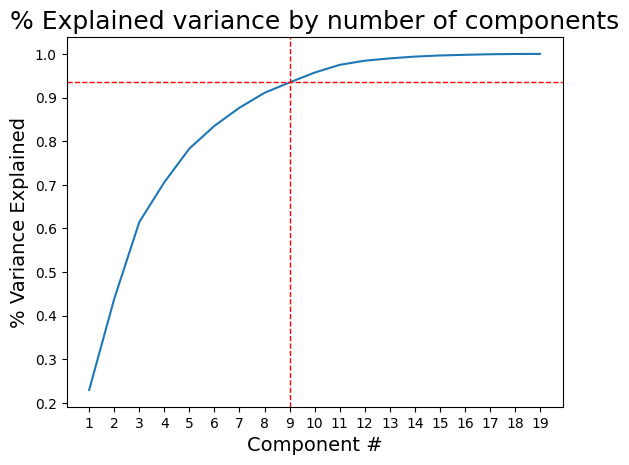

In [7]:
 # Applying PCA on InputData_Standardized
pca = PCA()
z = pca.fit_transform(df_scaled)
n_pca=19

plt.plot(np.arange(1,n_pca+1),np.cumsum(pca.explained_variance_ratio_[0:n_pca]))
# Linha vertical no x=9
plt.axvline(x=9, color='r', linestyle='--', linewidth=1)
# Linha horizontal no valor de y para x=9
plt.axhline(y=np.cumsum(pca.explained_variance_ratio_)[8], color='r', linestyle='--', linewidth=1)
plt.title("% Explained variance by number of components",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
# Coloque os xticks de 1 em 1
plt.xticks(np.arange(1,n_pca+1,1))
plt.show() 

Verifica-se a combinação linear das features utilizadas:

In [8]:
# Acesso aos componentes principais
pcs = pca.components_

# Transforme pcs em valores floats sem notação científica
np.set_printoptions(suppress=True)


# Visualização dos componentes principais
print("Componentes Principais:")
print(pcs)

# Transforme pcs em uma tabela latex, aproximando todos os números para 3 casas decimais
print("Componentes Principais em formato de tabela latex:")
print(pd.DataFrame(pcs).round(3).to_latex())


Componentes Principais:
[[ 0.5133139  -0.00511712  0.78537957 -0.01804695 -0.00912399 -0.00181522
  -0.00079711  0.00013224 -0.01258197 -0.06877761 -0.00652717 -0.03612999
   0.0029927  -0.02022012 -0.33211969 -0.00673577 -0.03828499  0.00466329
  -0.02752998]
 [-0.30005504 -0.00363729 -0.20115146 -0.02075777 -0.00799472 -0.00253369
  -0.00041778  0.0000847  -0.06057275 -0.24861607 -0.01638818 -0.03990238
  -0.00658615 -0.01357167 -0.84440956 -0.00132484 -0.29571062  0.03074932
   0.00188064]
 [ 0.77415583 -0.01116761 -0.57811741 -0.00988347 -0.01181431 -0.00489905
   0.00021248  0.00008556 -0.01915678 -0.01840403  0.00114151 -0.05682143
   0.00452294  0.0096537  -0.18179708  0.00119638  0.15801032  0.03041399
   0.05553177]
 [-0.19464735  0.04758989  0.05798384  0.04202026  0.00665865  0.00816965
   0.0006265  -0.00081354  0.0801716   0.33948618 -0.0061207   0.07169091
  -0.02662536  0.02591035 -0.34951735  0.00586623  0.83819734 -0.02442231
   0.0316855 ]
 [ 0.01472968  0.00528825  0

### K-Means com todas as features

In [9]:
# K-Means Algorithm
#-------------------------------------------------------------------
K_min = 5
K_max = 10
n_init = 10
k_list=[]
algorithm_list=[]
inertia_list=[]
silhouette_list = []
cluster_centers_list=[]
# Perform the k-means algorithm for different values of k
for k in range(K_min,K_max+1):
    print('k = ' + str(k))
    k_list.append(k)
    # Apply k-means algorithm with n_init different initializations
    current_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=0)
    current_kmeans.fit(df_scaled)
    # Store Objective Function (inertia: Sum of Squared Distances to Cluster Centers)
    inertia_list.append(current_kmeans.inertia_)
    # Store silhouette
    silhouette_list.append(silhouette_score(df_scaled, current_kmeans.labels_))
    # Store Cluster Centers
    cluster_centers_list.append(current_kmeans.cluster_centers_)
    # Store current algorithm
    algorithm_list.append(current_kmeans)

k = 5
k = 6
k = 7
k = 8
k = 9
k = 10


In [10]:
 # Select the algorithm_list (number of k) wanted
k = np.shape(algorithm_list[3].cluster_centers_)[0]
labels = algorithm_list[3].labels_

cluster_division = []
for n in range(0,k):
    cluster_division.append(labels==n)

# Calculates the number of instances for each cluster
for cluster in cluster_division:
    print(sum(cluster))

1801
2867
1934
2765
1883
1443
1733
1574


Text(0, 0.5, 'Silhouette')

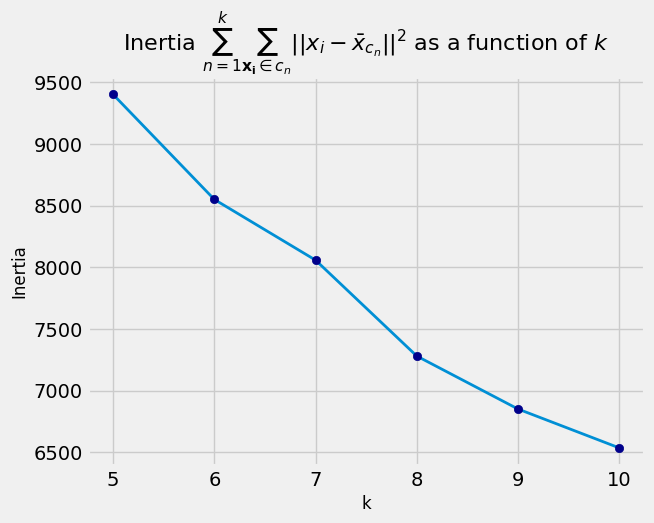

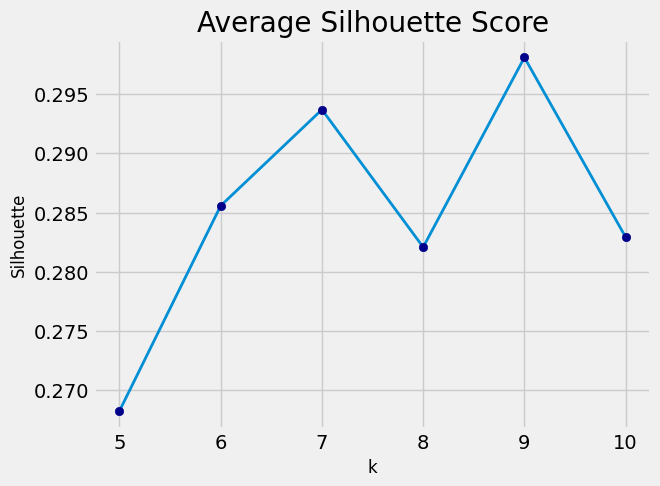

In [11]:
# Plotting Inertia and Silhouette values
#-------------------------------------------------------------------

plt.style.use('fivethirtyeight')
fig1 = plt.figure()
ax1 = fig1.gca()
ax1.plot(np.array(k_list), inertia_list,lw=2)
ax1.scatter(k_list, inertia_list, c='darkblue', zorder=10)
ax1.set_title('Inertia ' + r'$\sum_{n=1}^{k}$' + \
              r'$\sum_{\mathbf{x_i} \in c_n} ||x_i-\bar{x}_{c_n}||^2 $' + \
              ' as a function of ' + r'$k$', fontsize=16)
ax1.set_xlabel('k', fontsize=12)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Inertia', fontsize=12)


fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(np.array(k_list), silhouette_list,lw=2)
ax2.scatter(k_list, silhouette_list, c='darkblue', zorder=10)
ax2.set_title('Average Silhouette Score')
ax2.set_xlabel('k', fontsize=12)
ax2.set_ylabel('Silhouette', fontsize=12)

Usando t-SNE para a visualização dos dados:

In [17]:
perplexity= 10 # Parameter of t-sne, not significant
tsne = TSNE(n_components=2,perplexity=perplexity)
n=2  # Number of main componentes chosed
# Applying t-sne to data created by PCA
z_plot = tsne.fit_transform(z[:,:n])

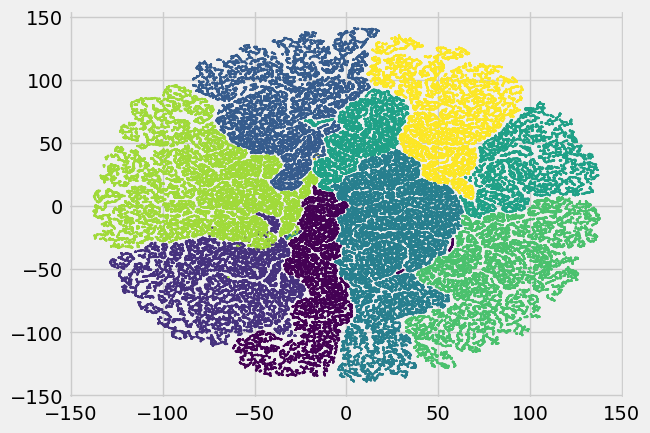

In [19]:
# Select the algorithm_list (number of k) wanted
# c is used to coloring the graphic
c = algorithm_list[3].fit_predict(df_scaled)

#Plot t-SNE projection with clusterization of algorithm_list[i] labels
plt.scatter(z_plot[:,0],z_plot[:,1],c=c,alpha=1,s=1)
plt.show()

In [67]:
def min_max_clusters(clusters):
    dfs = []
    for i, cluster in enumerate(clusters):
        df = cluster.describe().loc[['min', 'max','mean']].T
        df.rename(columns={'min': f'Cluster {i} Min', 'max': f'Cluster {i} Max','mean': f'Cluster {i} Mean'}, inplace=True)
        dfs.append(df)
    df_min_max = pd.concat(dfs, axis=1)
    return df_min_max

# Criando um dataframe com cada cluster:
clusters = []
for i in range(0,8):
    cluster = df_selected[algorithm_list[3].labels_ == i]
    clusters.append(cluster)

# Arredonde todas as casas decimais de min_max_cluster para 2:
pd.options.display.float_format = '{:.2f}'.format

# Exportando min_max_cluster pra csv:
min_max_clusters(clusters).to_csv('min_max_clusters.csv')
pd.options.display.max_columns = None
display(min_max_clusters(clusters))

,Cluster 0 Min,Cluster 0 Max,Cluster 0 Mean,Cluster 1 Min,Cluster 1 Max,Cluster 1 Mean,Cluster 2 Min,Cluster 2 Max,Cluster 2 Mean,Cluster 3 Min,Cluster 3 Max,Cluster 3 Mean,Cluster 4 Min,Cluster 4 Max,Cluster 4 Mean,Cluster 5 Min,Cluster 5 Max,Cluster 5 Mean,Cluster 6 Min,Cluster 6 Max,Cluster 6 Mean,Cluster 7 Min,Cluster 7 Max,Cluster 7 Mean
type_mapped,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
Age,0.00,90.00,32.86,0.00,95.00,33.11,0.00,90.00,33.03,0.00,79.00,32.59,2.00,73.00,32.60,7.00,78.00,30.70,0.00,86.00,35.58,0.00,72.00,33.33
gender_maped,0.00,1.00,0.55,0.47,1.00,1.00,0.00,0.47,0.04,0.00,0.47,0.03,1.00,1.00,1.00,0.00,0.47,0.00,0.00,0.47,0.02,0.47,1.00,1.00
upgrade,0.00,1.00,0.07,0.00,1.00,0.10,0.00,1.00,0.09,0.00,1.00,0.10,0.00,1.00,0.10,0.00,1.00,0.11,0.00,1.00,0.13,0.00,1.00,0.10
count_subscriptions,1.00,5.00,1.12,1.00,8.00,1.27,1.00,5.00,1.17,1.00,8.00,1.24,1.00,5.00,1.17,1.00,5.00,1.19,1.00,5.00,1.31,1.00,6.00,1.20
numero_de_ids_distintos,0.00,14.00,0.22,0.00,15.00,0.44,0.00,22.00,0.28,0.00,19.00,0.25,0.00,18.00,0.27,0.00,11.00,0.21,0.00,30.00,0.57,0.00,18.00,0.33
Binario_fee,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
Fee,0.00,384.00,0.35,0.00,1714.28,0.73,0.00,16500.00,9.45,0.00,2500.00,1.33,0.00,11800.00,8.42,0.00,15600.00,11.33,0.00,560.00,1.57,0.00,4071.06,2.59
NumGymsWithinRadius,0.00,538.00,86.51,0.00,537.00,112.35,0.00,551.00,69.91,0.00,552.00,100.58,0.00,541.00,96.42,0.00,547.00,101.29,0.00,558.00,103.04,0.00,548.00,87.22
NumGymsNearCompany,0.00,563.00,197.81,0.00,563.00,281.86,0.00,563.00,183.24,0.00,566.00,262.35,0.00,563.00,297.80,0.00,563.00,295.51,3.00,545.00,347.15,0.00,548.00,207.03


### K-Means para apenas as colunas com coeficiente > mod(0.05) nas nove primeiras componentes principais:

In [12]:
# Selecionando colunas específicas do df_scaled:
df_scaled = df_scaled[:,[0,1,2,3,8,9,10,11,13,14,16,17,18]] # 13 das 19 colunas

In [13]:
# K-Means Algorithm
#-------------------------------------------------------------------
K_min = 5
K_max = 10
n_init = 10
k_list=[]
algorithm_list=[]
inertia_list=[]
silhouette_list = []
cluster_centers_list=[]
# Perform the k-means algorithm for different values of k
for k in range(K_min,K_max+1):
    print('k = ' + str(k))
    k_list.append(k)
    # Apply k-means algorithm with n_init different initializations
    current_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=0)
    current_kmeans.fit(df_scaled)
    # Store Objective Function (inertia: Sum of Squared Distances to Cluster Centers)
    inertia_list.append(current_kmeans.inertia_)
    # Store silhouette
    silhouette_list.append(silhouette_score(df_scaled, current_kmeans.labels_))
    # Store Cluster Centers
    cluster_centers_list.append(current_kmeans.cluster_centers_)
    # Store current algorithm
    algorithm_list.append(current_kmeans)

k = 5
k = 6
k = 7
k = 8
k = 9
k = 10


In [14]:
 # Select the algorithm_list (number of k) wanted
k = np.shape(algorithm_list[3].cluster_centers_)[0]
labels = algorithm_list[3].labels_

cluster_division = []
for n in range(0,k):
    cluster_division.append(labels==n)

# Calculates the number of instances for each cluster
for cluster in cluster_division:
    print(sum(cluster))

1579
1442
3872
2725
1883
1801
1901
797


Text(0, 0.5, 'Silhouette')

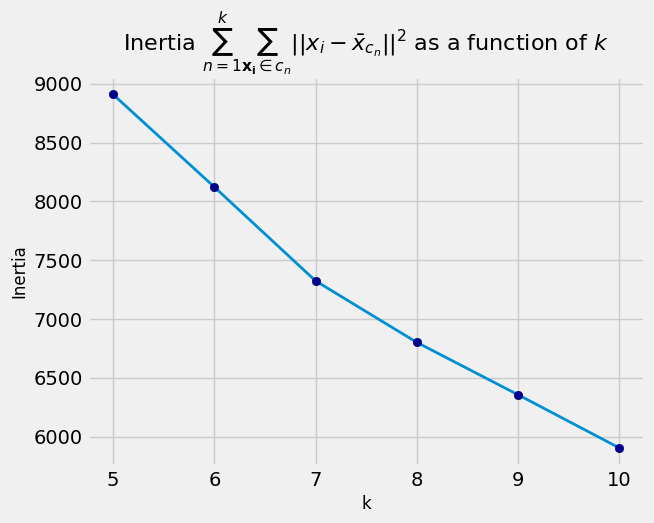

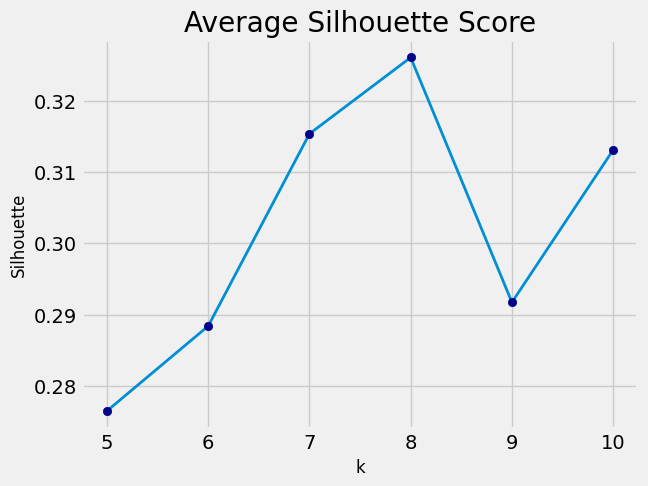

In [15]:
# Plotting Inertia and Silhouette values
#-------------------------------------------------------------------

plt.style.use('fivethirtyeight')
fig1 = plt.figure()
ax1 = fig1.gca()
ax1.plot(np.array(k_list), inertia_list,lw=2)
ax1.scatter(k_list, inertia_list, c='darkblue', zorder=10)
ax1.set_title('Inertia ' + r'$\sum_{n=1}^{k}$' + \
              r'$\sum_{\mathbf{x_i} \in c_n} ||x_i-\bar{x}_{c_n}||^2 $' + \
              ' as a function of ' + r'$k$', fontsize=16)
ax1.set_xlabel('k', fontsize=12)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Inertia', fontsize=12)


fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(np.array(k_list), silhouette_list,lw=2)
ax2.scatter(k_list, silhouette_list, c='darkblue', zorder=10)
ax2.set_title('Average Silhouette Score')
ax2.set_xlabel('k', fontsize=12)
ax2.set_ylabel('Silhouette', fontsize=12)

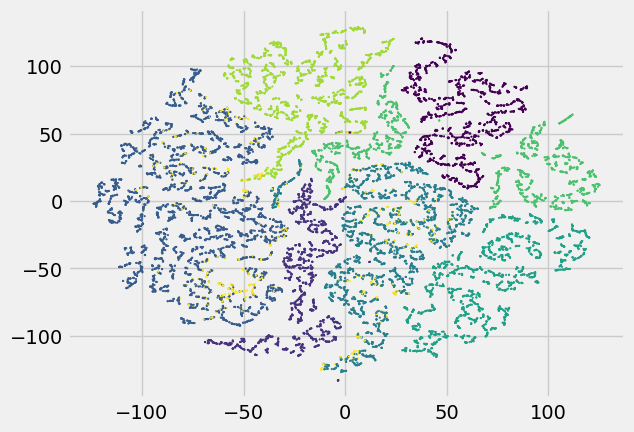

In [18]:
# Select the algorithm_list (number of k) wanted
# c is used to coloring the graphic
c = algorithm_list[3].fit_predict(df_scaled)

#Plot t-SNE projection with clusterization of algorithm_list[i] labels
plt.scatter(z_plot[:,0],z_plot[:,1],c=c,alpha=1,s=1)
plt.show()

In [72]:
def min_max_clusters(clusters):
    dfs = []
    for i, cluster in enumerate(clusters):
        df = cluster.describe().loc[['min', 'max','mean']].T
        df.rename(columns={'min': f'Cluster {i} Min', 'max': f'Cluster {i} Max','mean': f'Cluster {i} Mean'}, inplace=True)
        dfs.append(df)
    df_min_max = pd.concat(dfs, axis=1)
    return df_min_max

# Criando um dataframe com cada cluster:
clusters = []
for i in range(0,8):
    cluster = df_selected[algorithm_list[3].labels_ == i]
    clusters.append(cluster)

# Arredonde todas as casas decimais de min_max_cluster para 2:
pd.options.display.float_format = '{:.2f}'.format

# Exportando min_max_cluster pra csv:
min_max_clusters(clusters).to_csv('min_max_clusters.csv')
pd.options.display.max_columns = None
display(min_max_clusters(clusters))

,Cluster 0 Min,Cluster 0 Max,Cluster 0 Mean,Cluster 1 Min,Cluster 1 Max,Cluster 1 Mean,Cluster 2 Min,Cluster 2 Max,Cluster 2 Mean,Cluster 3 Min,Cluster 3 Max,Cluster 3 Mean,Cluster 4 Min,Cluster 4 Max,Cluster 4 Mean,Cluster 5 Min,Cluster 5 Max,Cluster 5 Mean,Cluster 6 Min,Cluster 6 Max,Cluster 6 Mean,Cluster 7 Min,Cluster 7 Max,Cluster 7 Mean
type_mapped,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
Age,0.00,72.00,33.34,7.00,78.00,30.70,0.00,86.00,33.70,0.00,95.00,33.00,2.00,73.00,32.60,0.00,90.00,32.86,0.00,90.00,33.01,4.00,91.00,34.24
gender_maped,0.47,1.00,1.00,0.00,0.47,0.00,0.00,0.47,0.01,0.47,1.00,0.97,1.00,1.00,1.00,0.00,1.00,0.55,0.00,0.47,0.04,0.00,1.00,0.38
upgrade,0.00,1.00,0.10,0.00,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.10,0.00,1.00,0.07,0.00,1.00,0.08,1.00,1.00,1.00
count_subscriptions,1.00,6.00,1.20,1.00,5.00,1.19,1.00,8.00,1.27,1.00,8.00,1.27,1.00,5.00,1.17,1.00,5.00,1.12,1.00,5.00,1.17,1.00,5.00,1.28
numero_de_ids_distintos,0.00,18.00,0.33,0.00,11.00,0.21,0.00,30.00,0.37,0.00,15.00,0.46,0.00,18.00,0.27,0.00,14.00,0.22,0.00,22.00,0.27,0.00,13.00,0.33
Binario_fee,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
Fee,0.00,4071.06,2.58,0.00,15600.00,11.34,0.00,582.40,0.78,0.00,2500.00,1.68,0.00,11800.00,8.42,0.00,384.00,0.35,0.00,16500.00,9.31,0.00,584.00,1.81
NumGymsWithinRadius,0.00,548.00,87.68,0.00,547.00,101.19,0.00,558.00,101.07,0.00,536.00,109.00,0.00,541.00,96.42,0.00,538.00,86.51,0.00,551.00,67.41,0.00,537.00,121.14
NumGymsNearCompany,0.00,548.00,207.92,0.00,563.00,295.46,0.00,566.00,291.17,0.00,563.00,288.71,0.00,563.00,297.80,0.00,563.00,197.81,0.00,563.00,179.80,0.00,547.00,290.42


Descrição das colunas:
- type_mapped: 0 - Holder, 1 - Relative
- Age: Idade
- gender_maped: 0 - Masculino, 1 - Feminino
- upgrade: 0 - Não, 1 - Sim
- count_subscriptions: Número de freezes
- numero_de_ids_distintos: Número de ids distintos
- Binario_fee: 0 - Não pagador de taxa, 1 - Pagador de taxa
- Fee: Valor da taxa paga
- NumGymsWithinRadius: Número de academias dentro do raio de 5 km
- NumGymsNearCompany: Número de academias perto da empresa dentro do raio de 5 km
- distancia_cliente_empresa: Distância entre cliente e empresa
- normalized_stats: Tendência de aumento (+) ou diminuição (-) de frequência
- gym_status: 0 - Academia favorita inativa, 1 - Academia favorita ativa
- utilizacoes: utilizações de academia no período dado
- pref_modality: 0 - Não musculação, 1 - Musculação
- num_distinct_gyms: Número de academias distintas frequentadas
- payment_source_y: 0 - Payroll deduction, 1 - Prepaid, 2 - Own wallet
- most_frequent_hour: Hora mais frequente
- uses_per_week: Utilizações média por semana

### Gráficos úteis para a análise:

In [27]:
# Fazendo um gráfico de colunas para comparar uma feature em cada cluster:
def compara_feature(feature):
    plt.figure(figsize=(10,6))
    for i in range(0,7):
        sns.kdeplot(clusters[i][feature], label = 'Cluster ' + str(i))
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']
    plt.legend(labels)
    plt.title('Comparação da feature ' + feature + ' em cada cluster')
    plt.show()

    # Plotar um gráfico de barras para comparar a média da feature em cada cluster:
    plt.figure(figsize=(10,6))
    sns.barplot(x = [0,1,2,3,4,5,6], y = [clusters[i][feature].mean() for i in range(0,7)])
    plt.title('Média da feature ' + feature + ' em cada cluster')
    plt.xticks([0,1,2,3,4,5,6], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7'])
    plt.show()


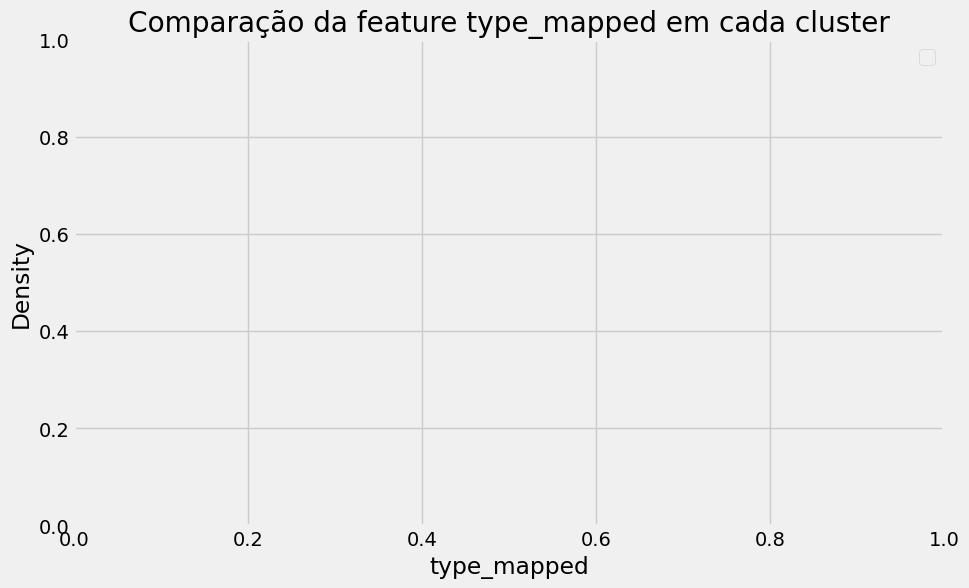

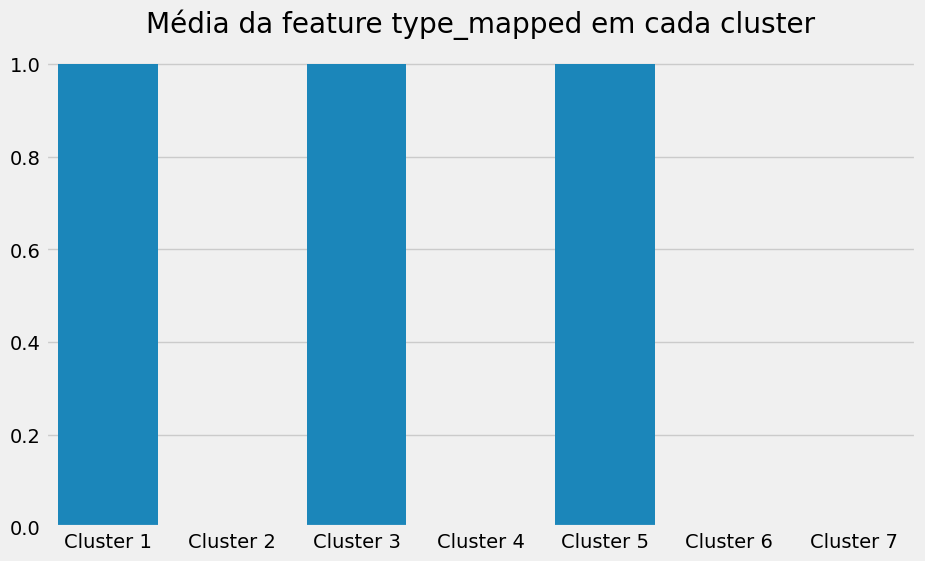

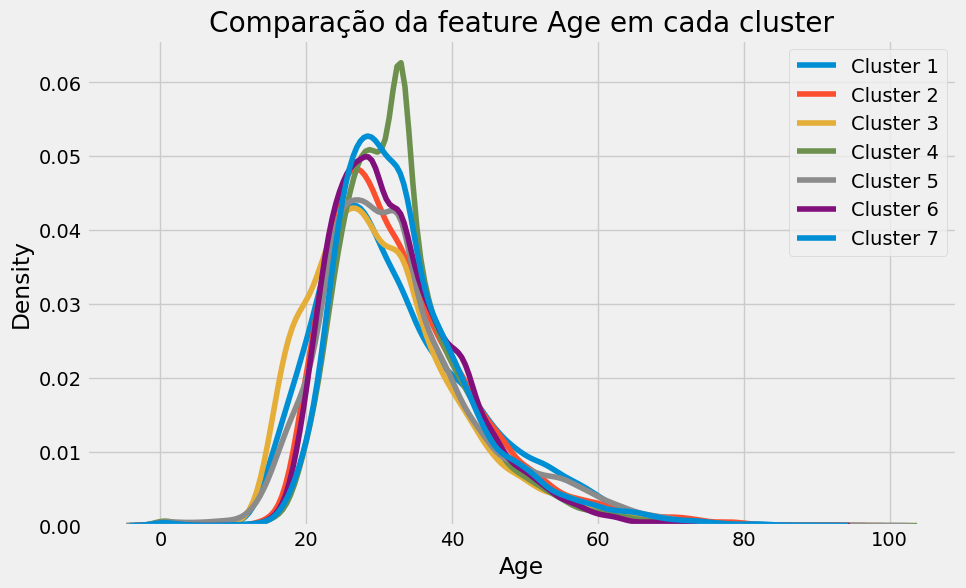

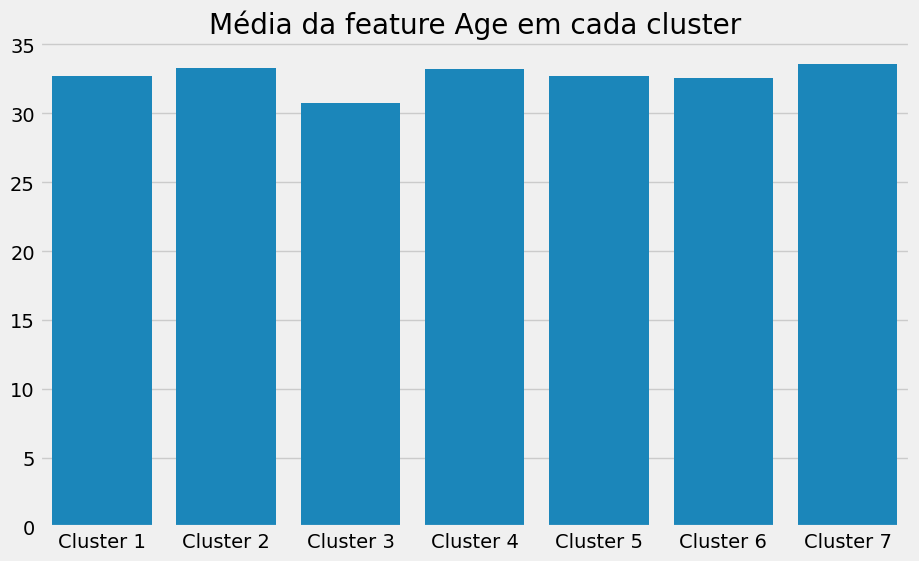

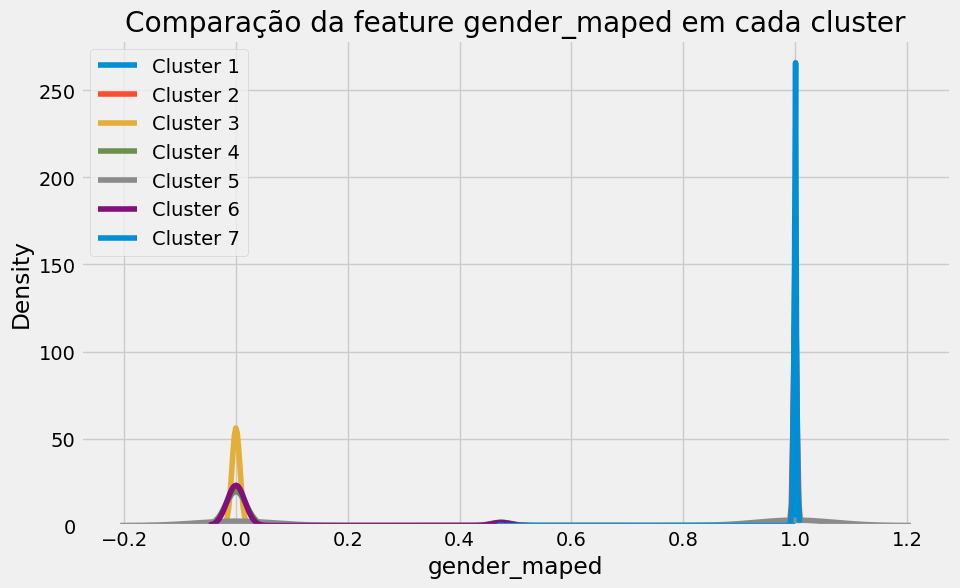

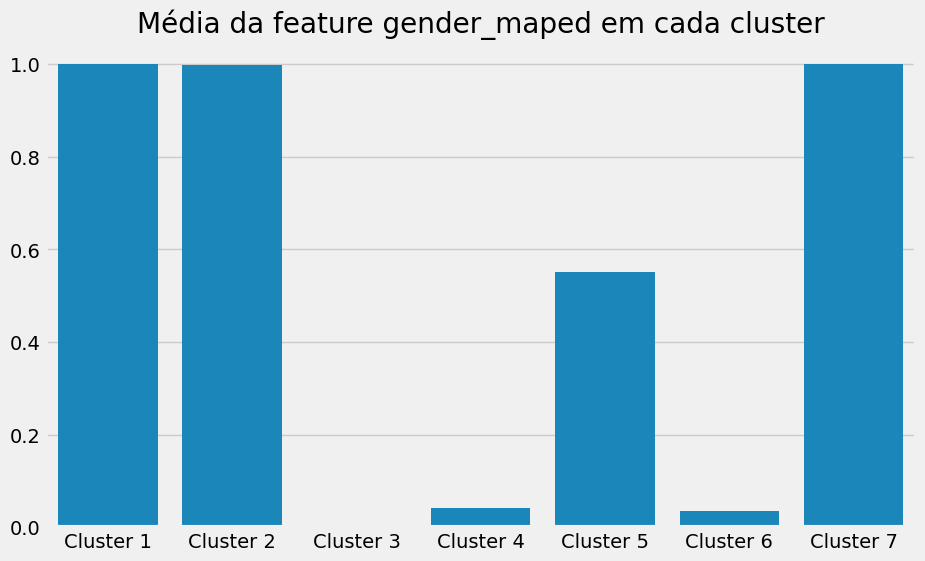

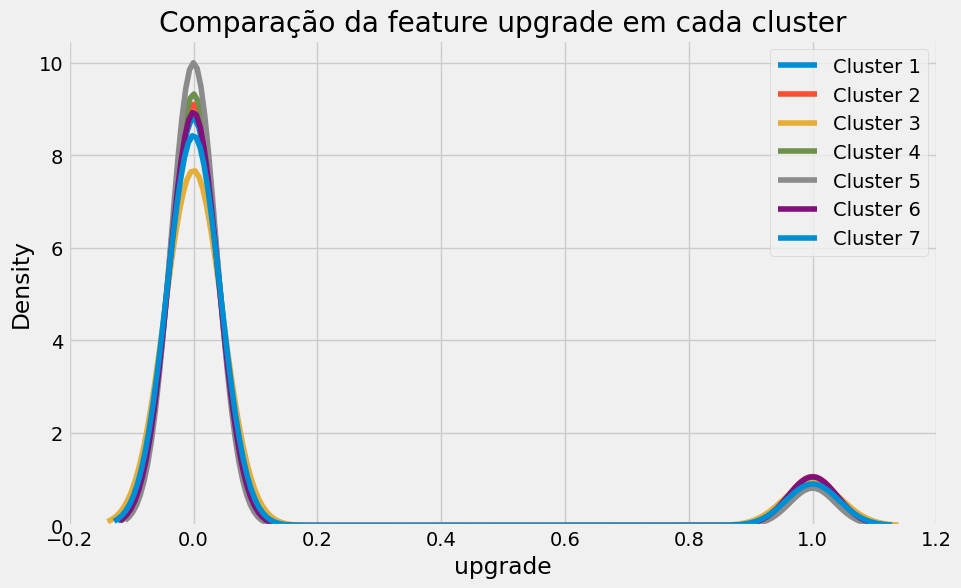

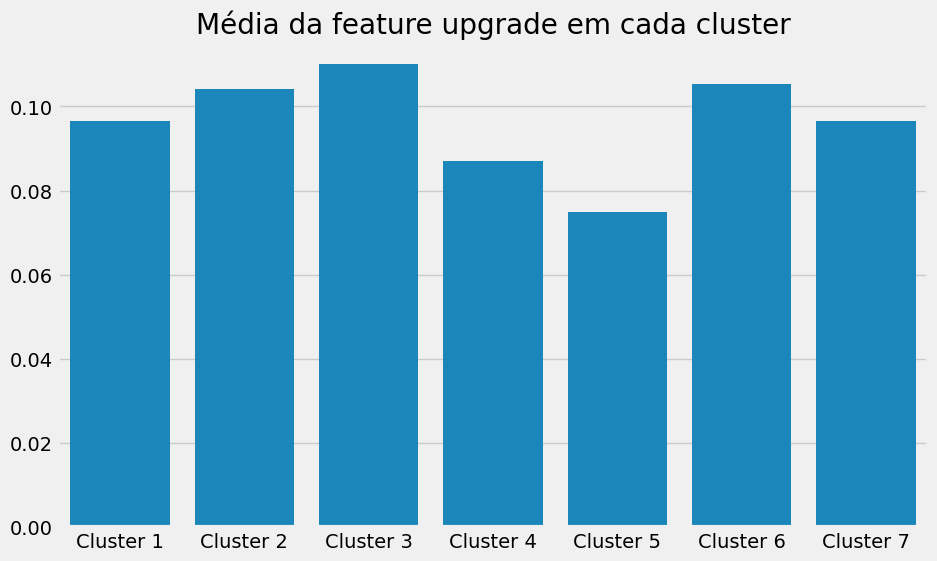

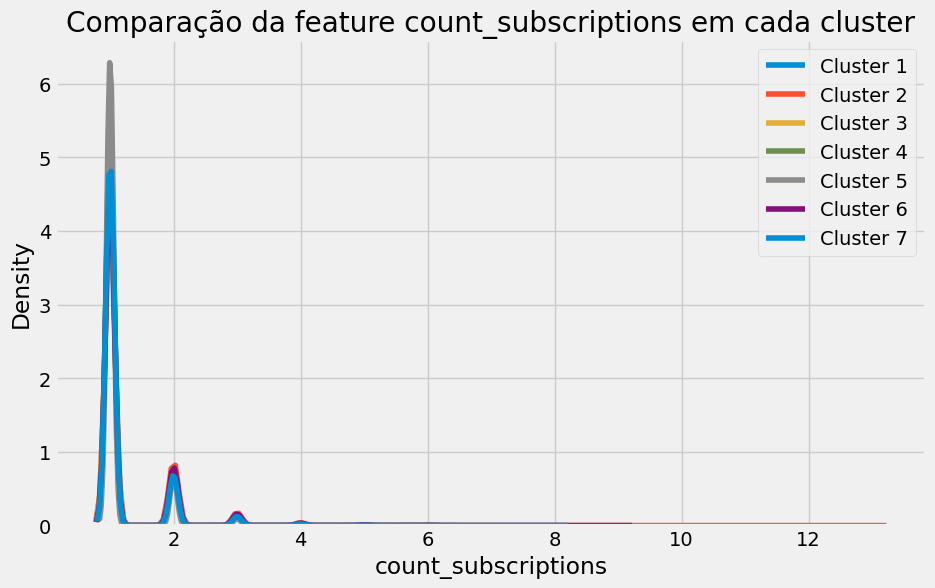

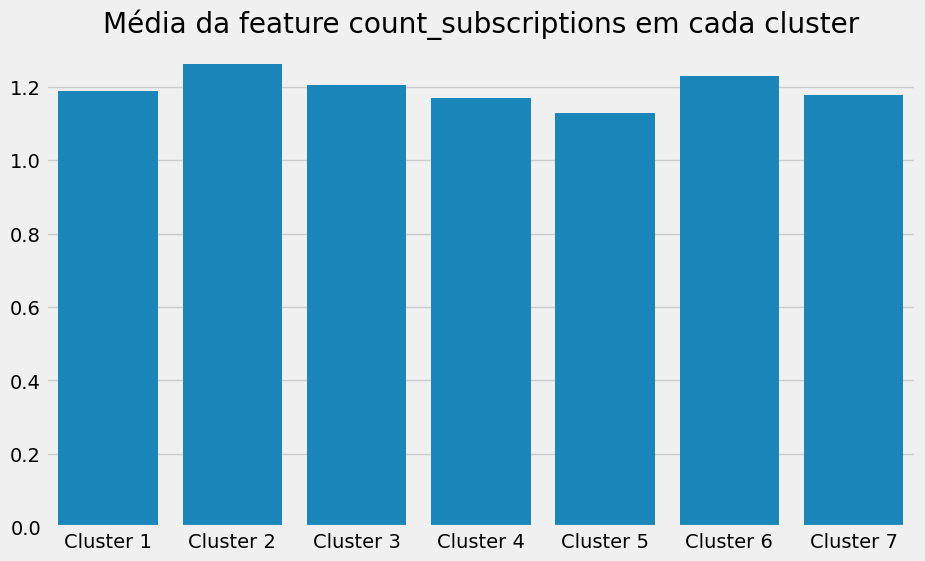

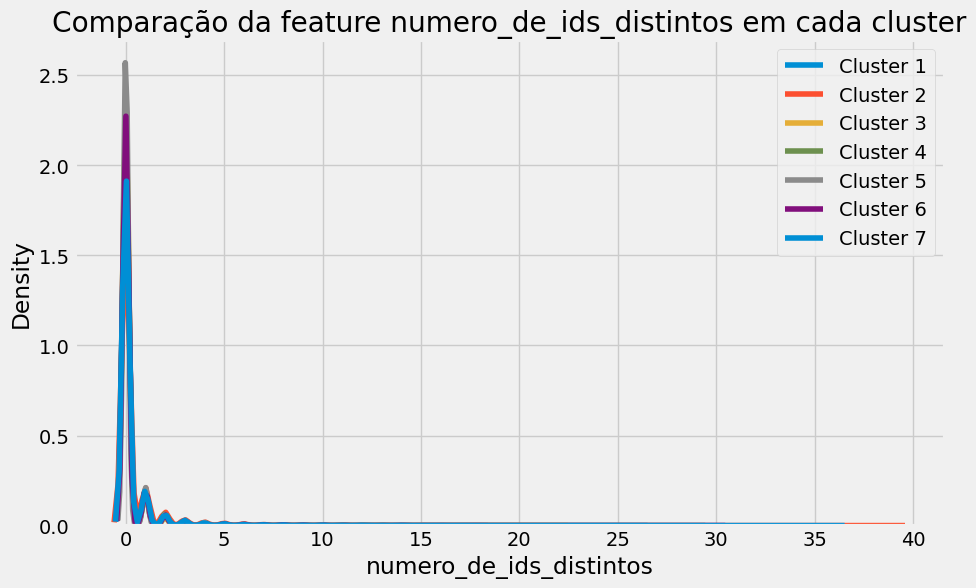

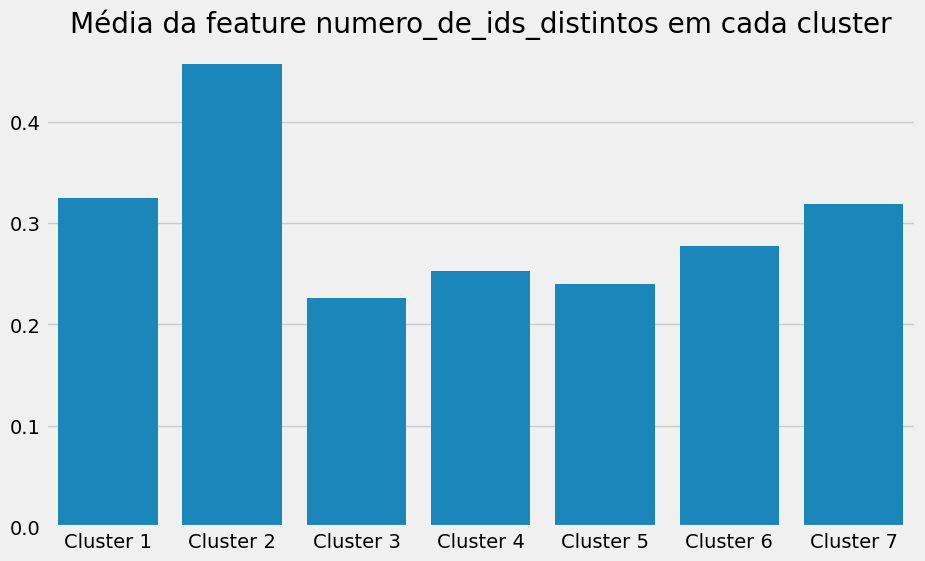

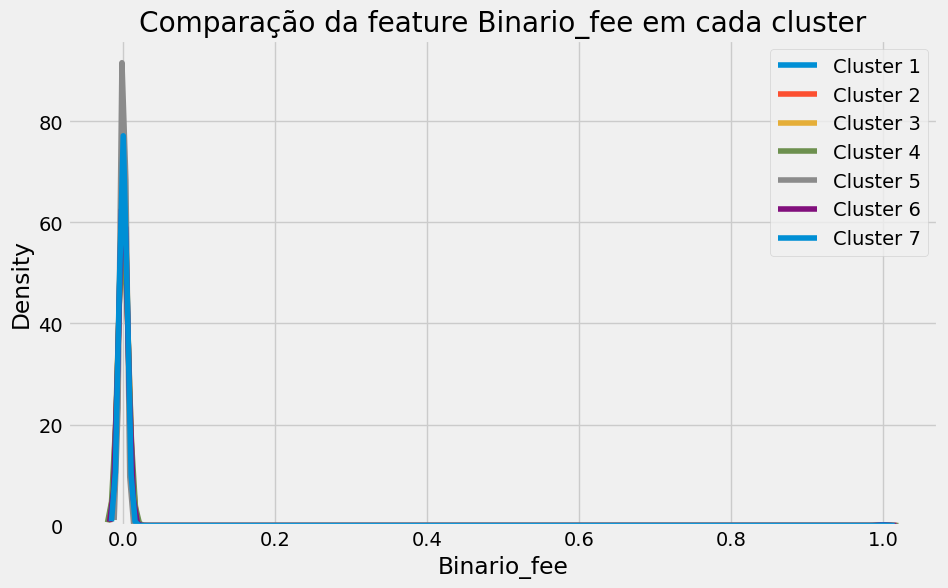

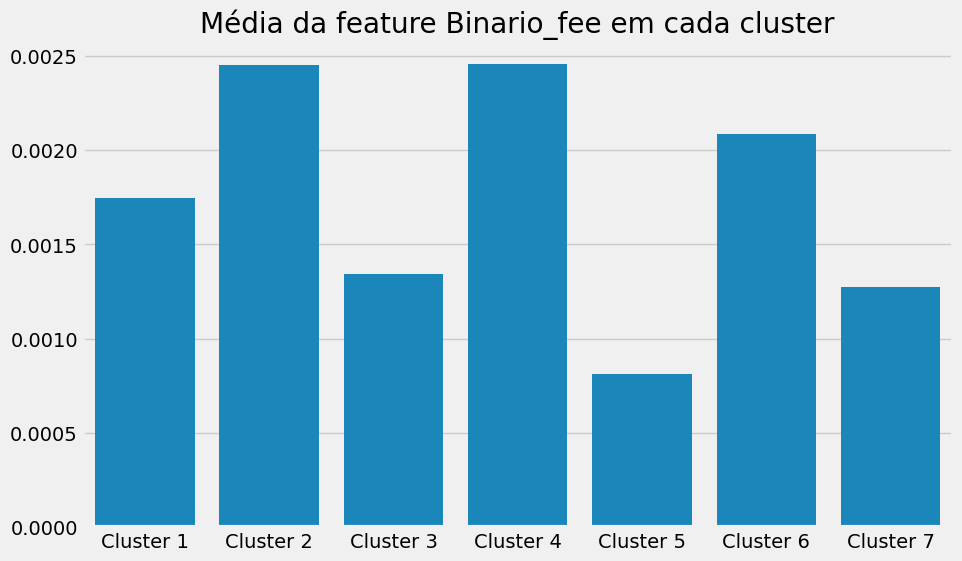

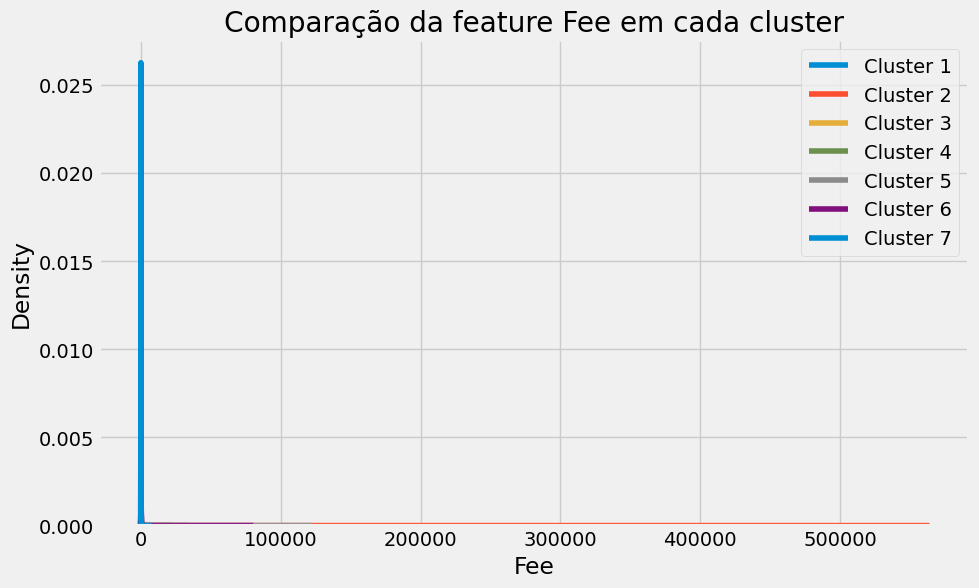

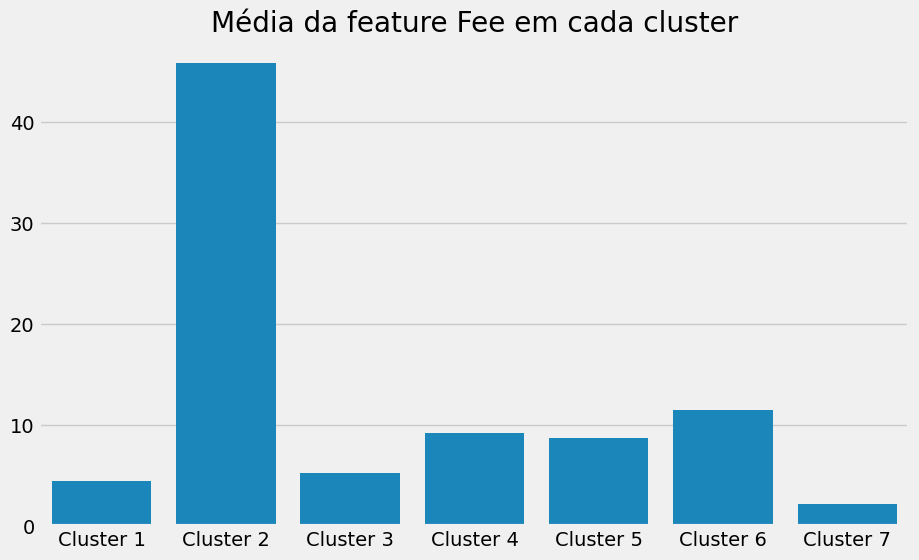

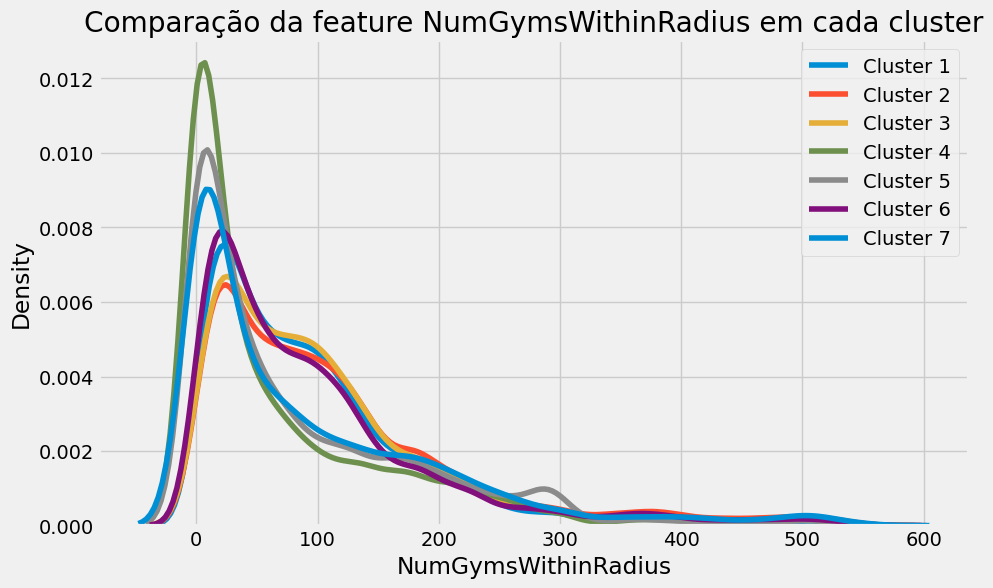

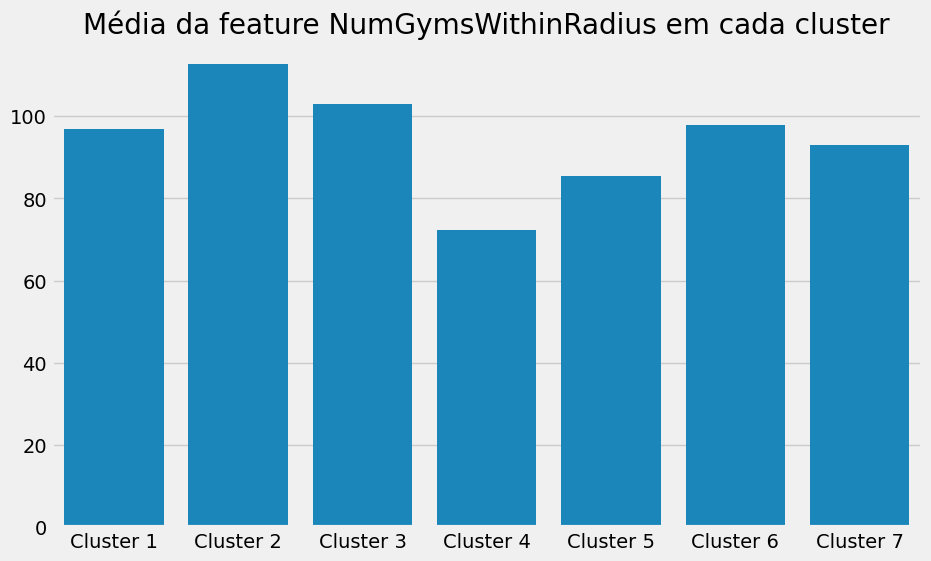

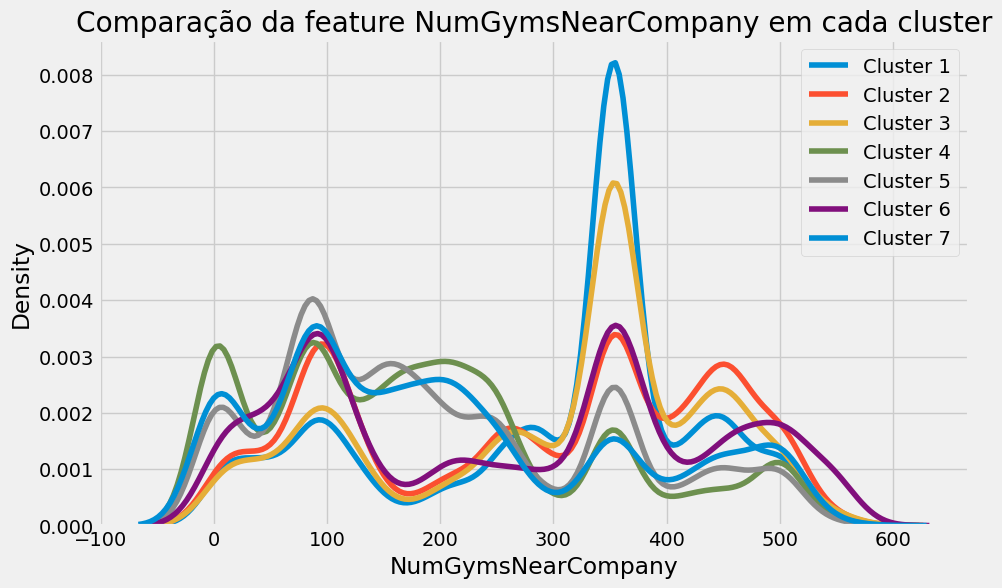

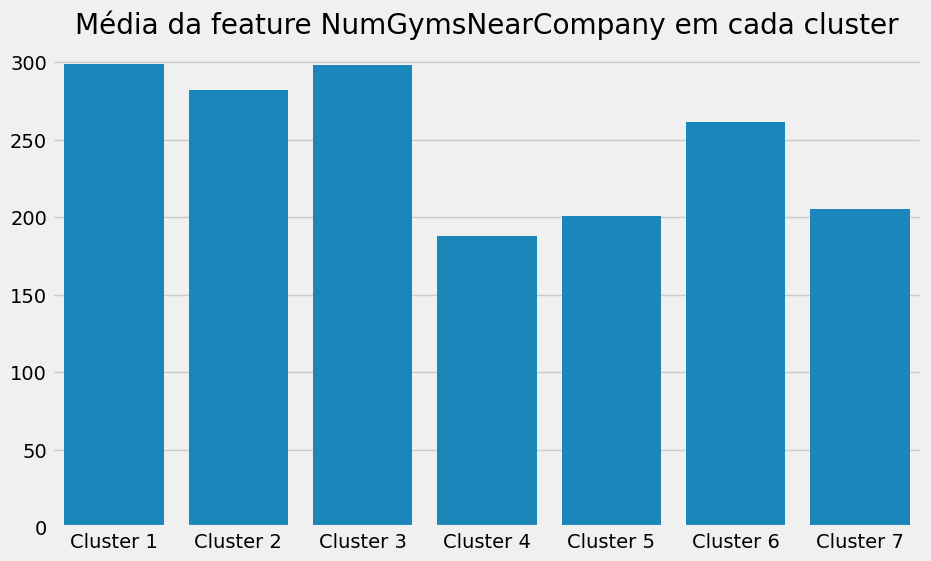

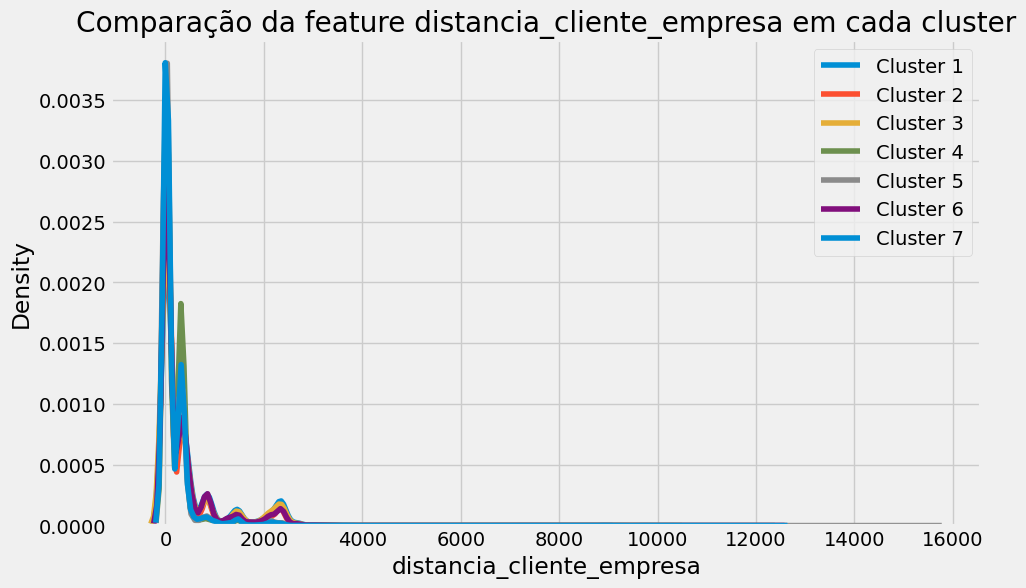

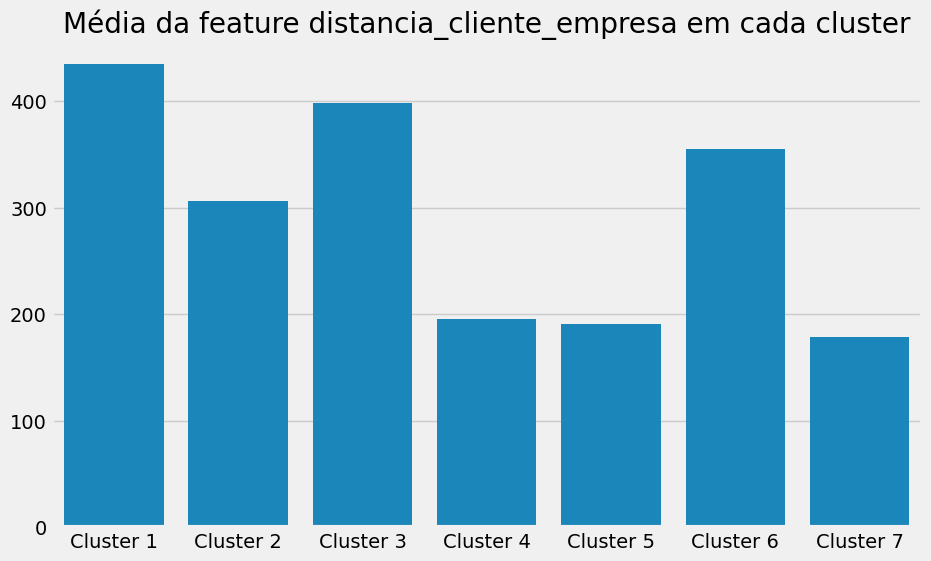

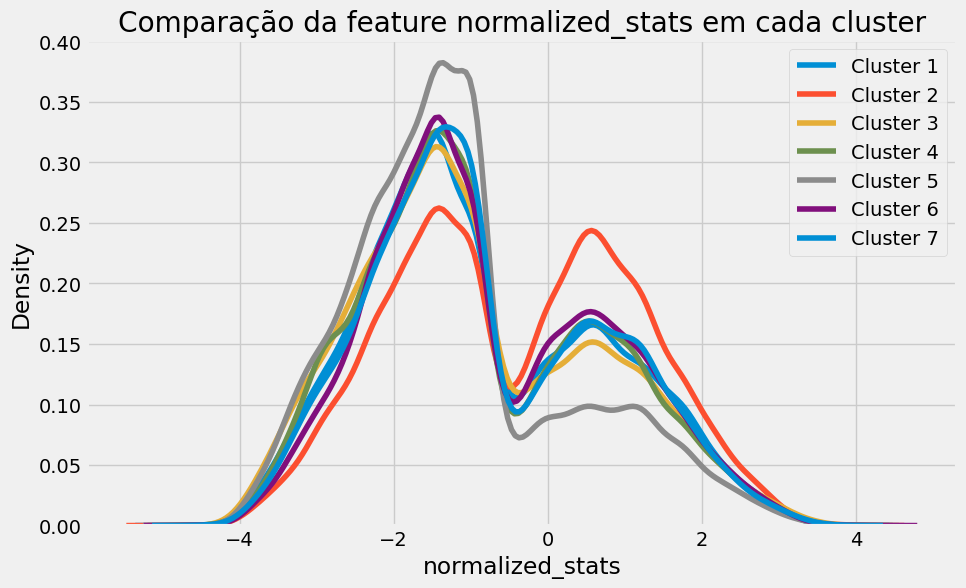

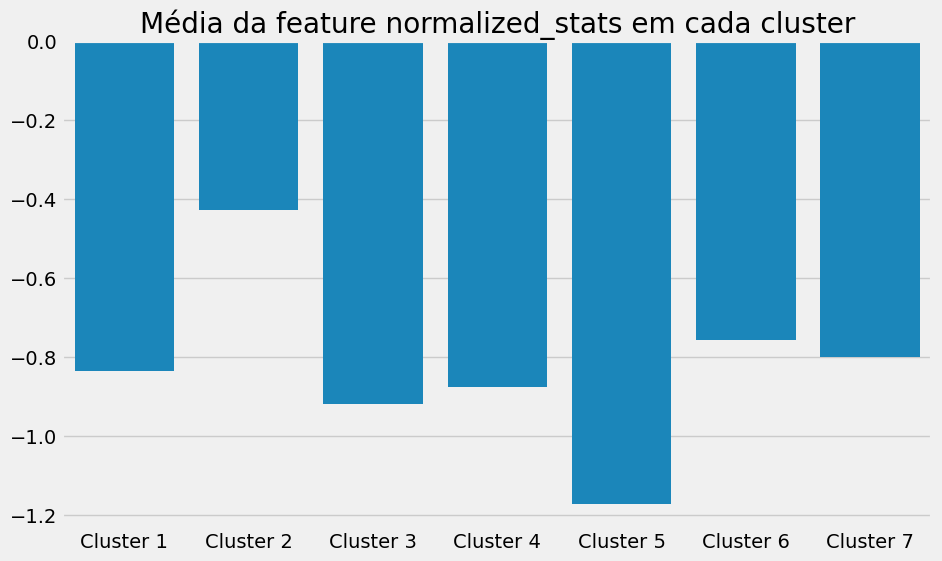

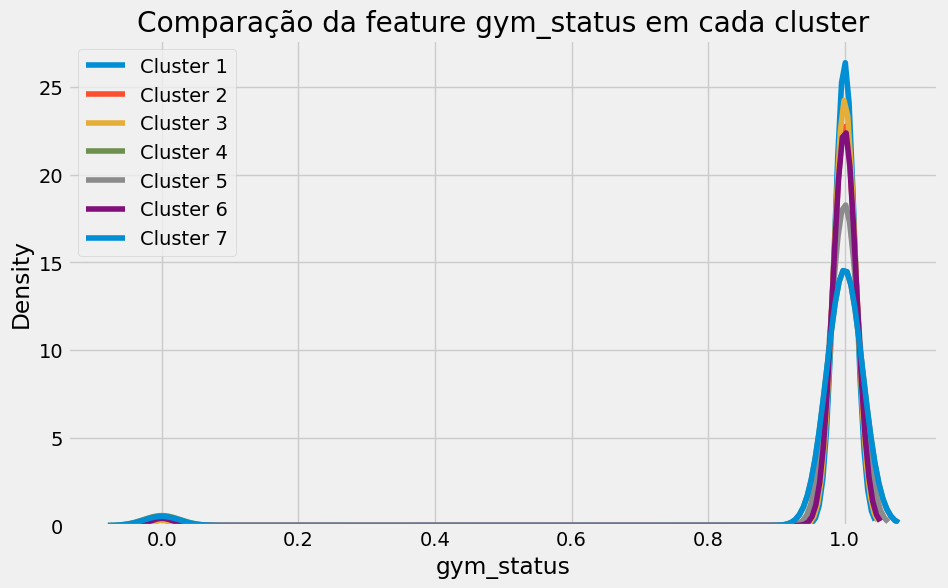

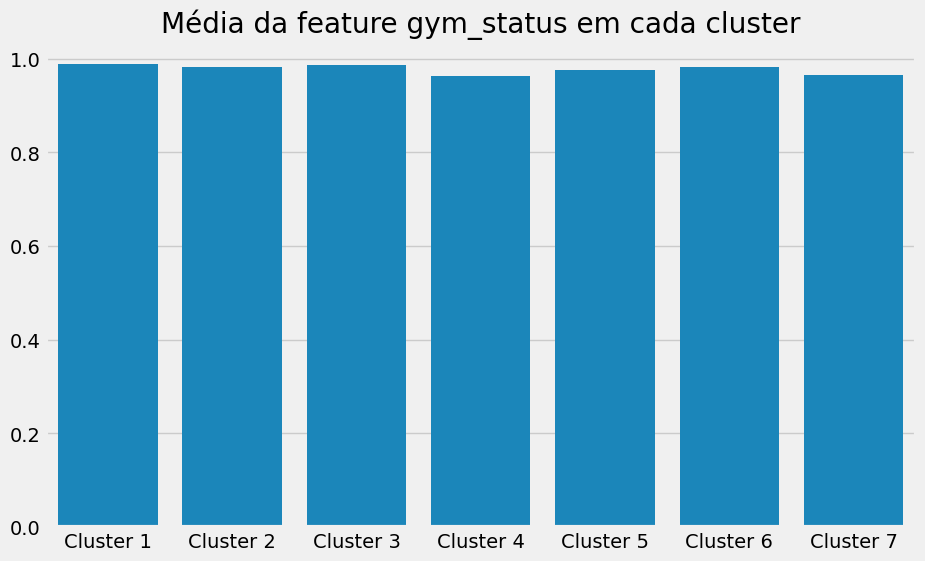

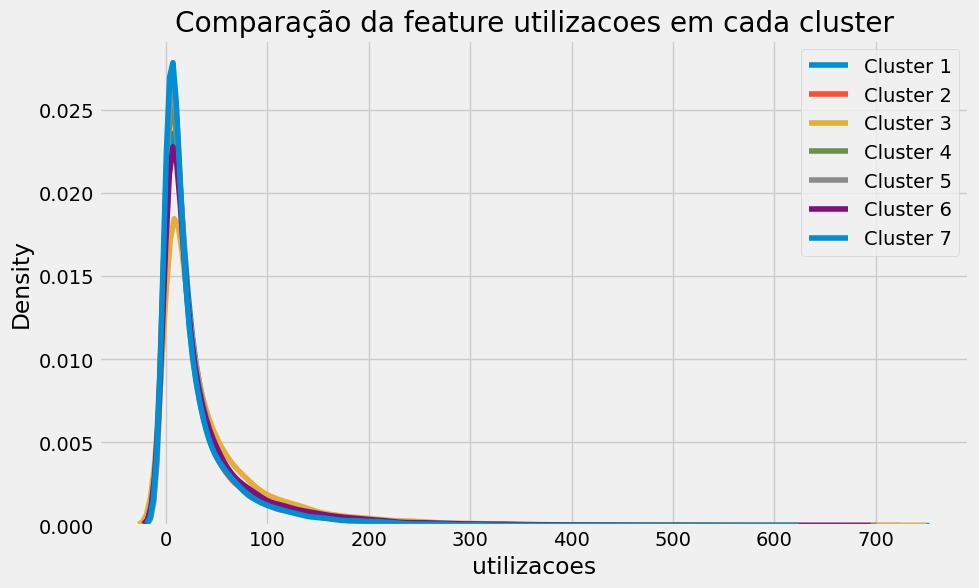

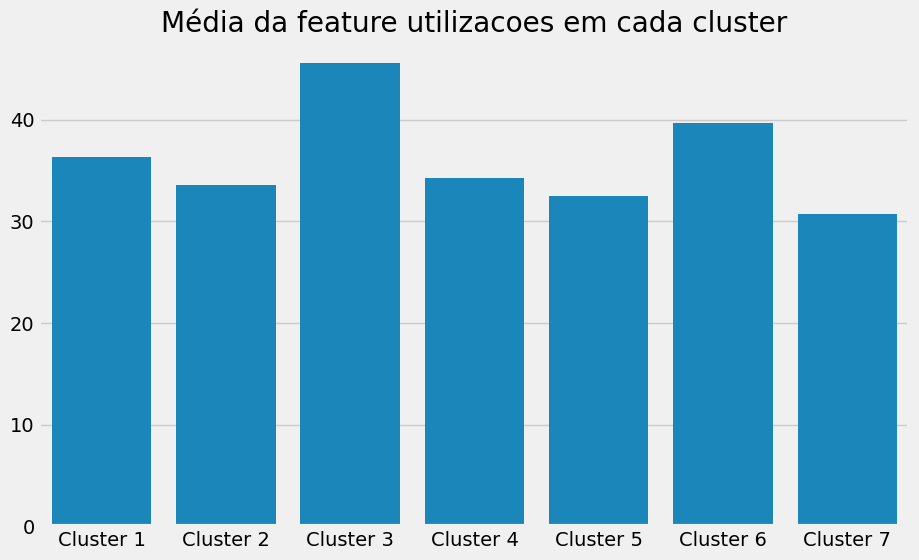

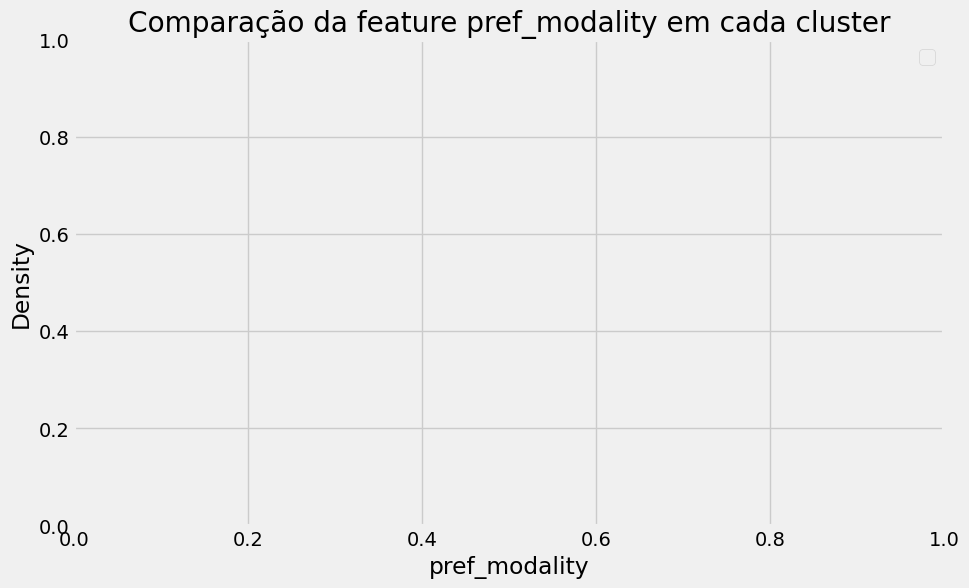

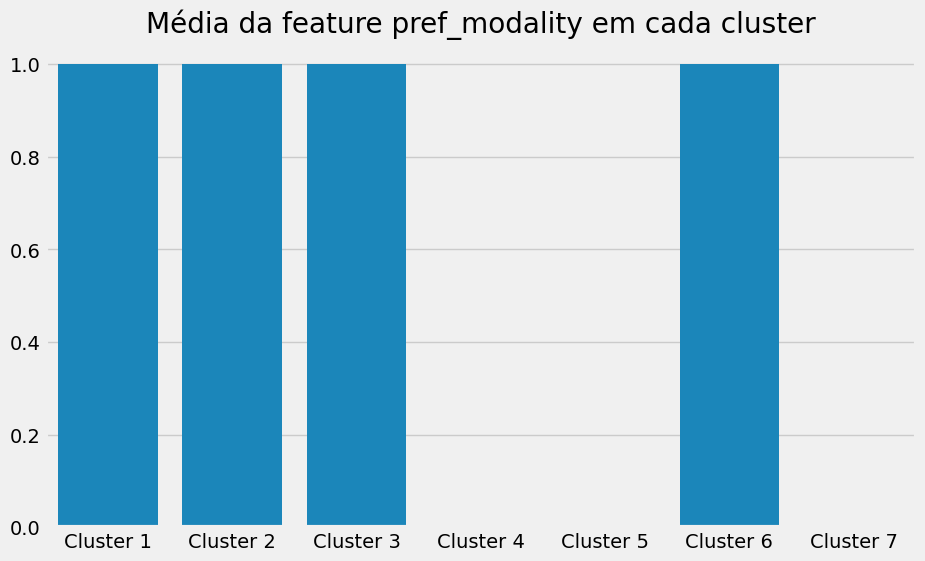

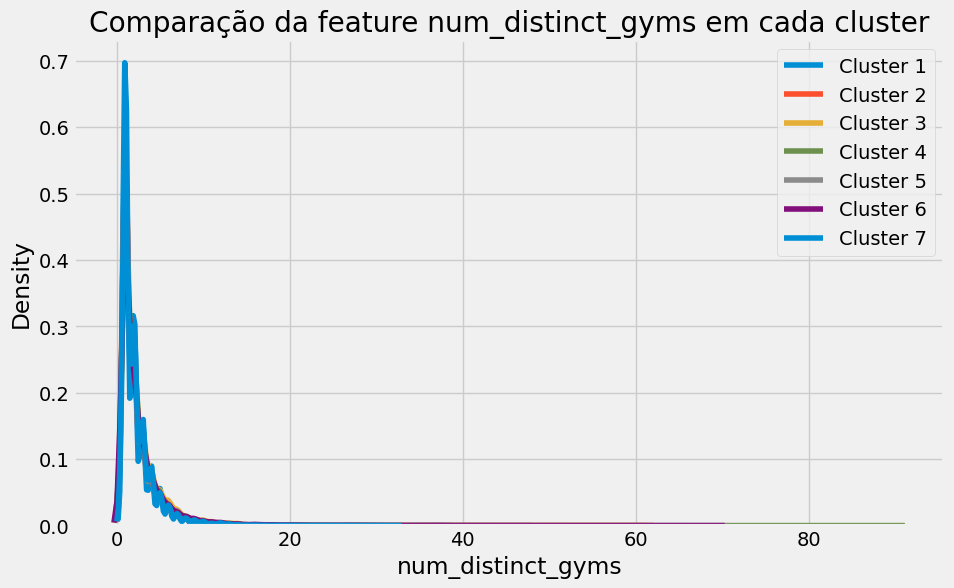

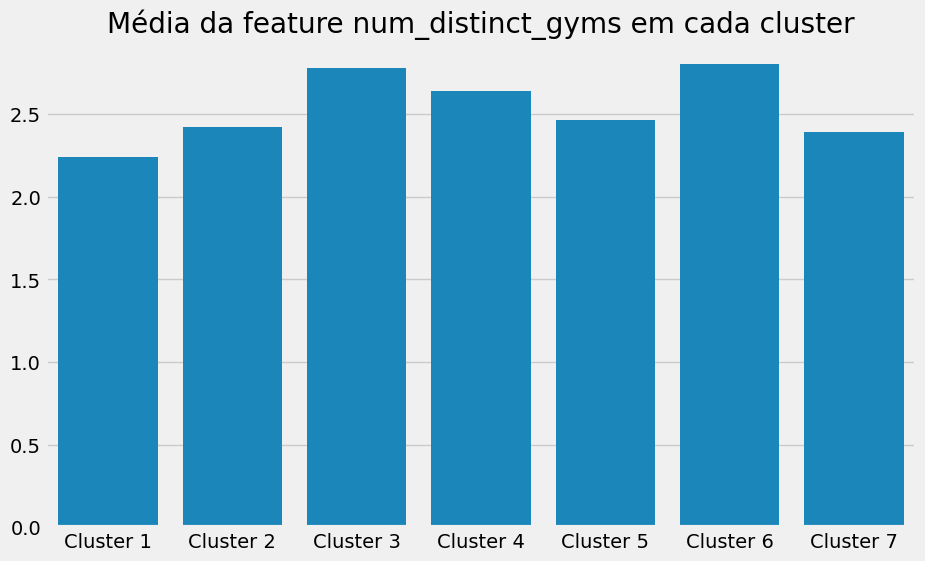

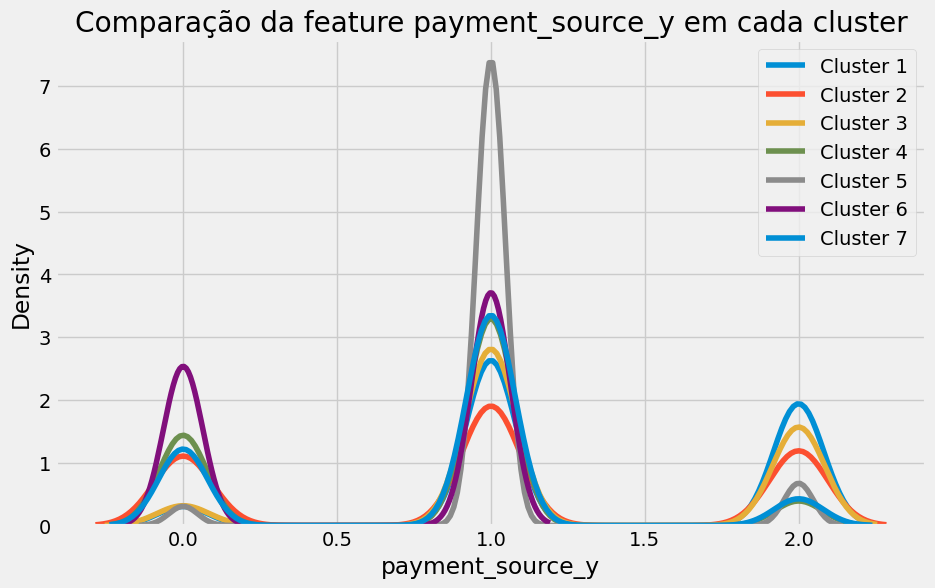

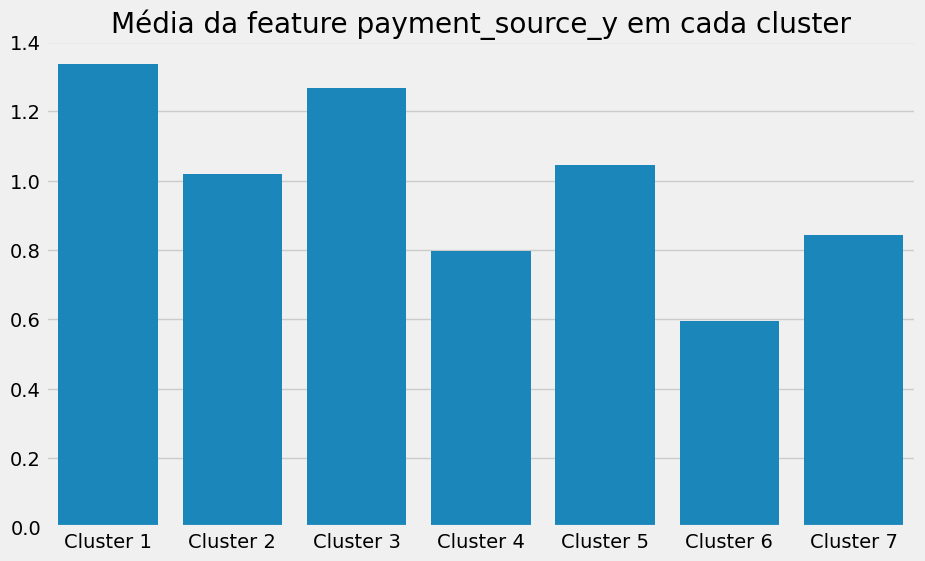

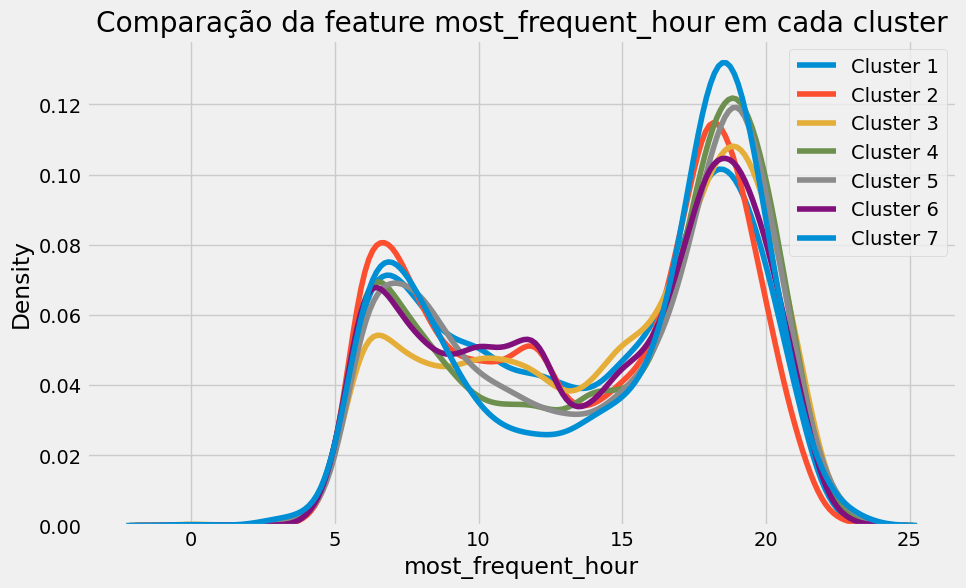

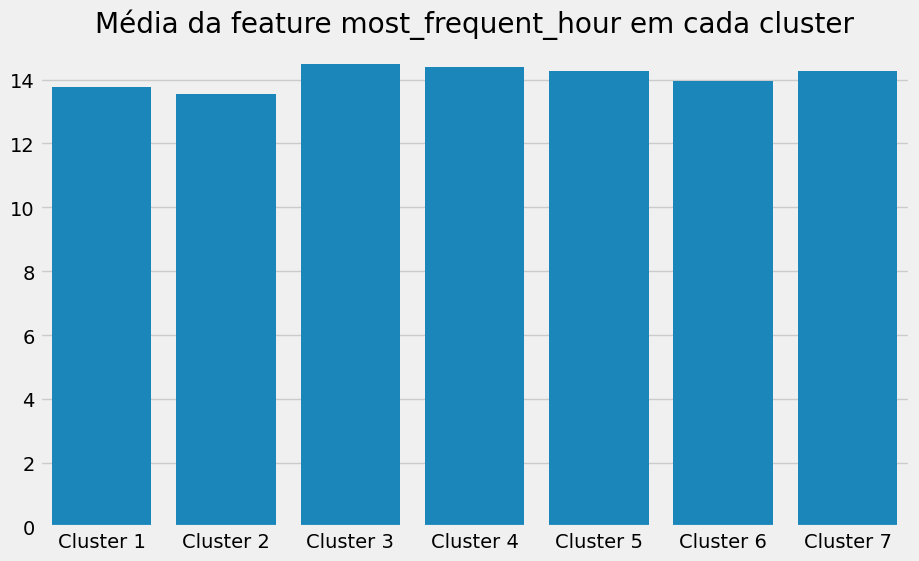

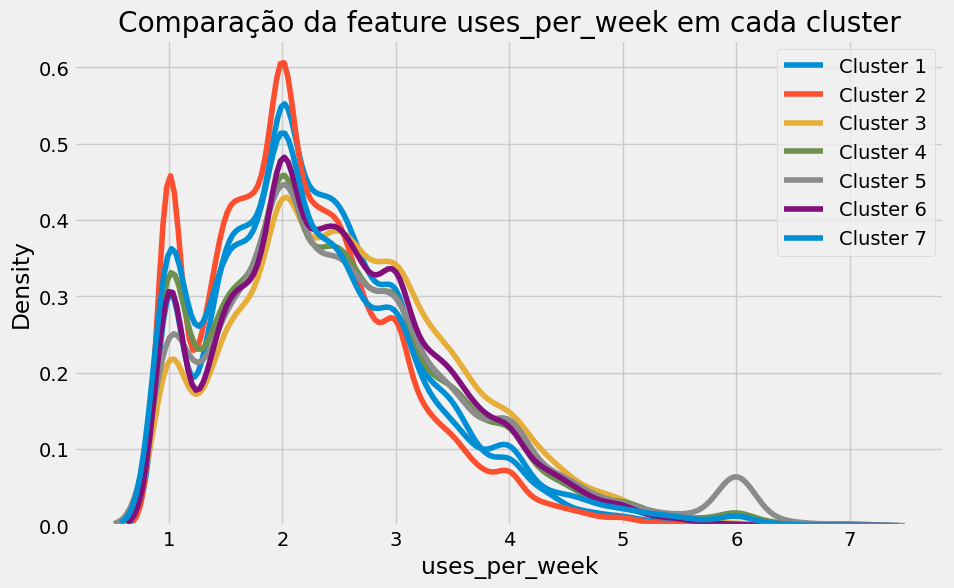

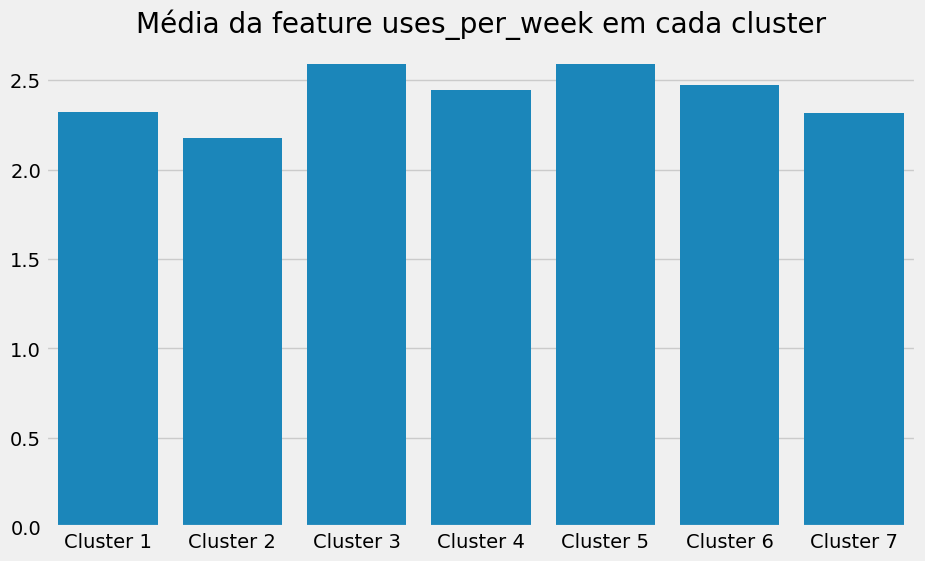

In [28]:
for column in df_selected.columns:
    compara_feature(column)

In [29]:
def compare_columns(column1, column2):
    plt.figure(figsize=(10,6))
    for i in range(0,7):
        plt.scatter(clusters[i][column1].mean(), clusters[i][column2].mean(), label = 'Cluster ' + str(i))
    plt.title('Média de '+str(column1)+' por '+str(column2)+' em cada cluster')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.legend()
    plt.show()

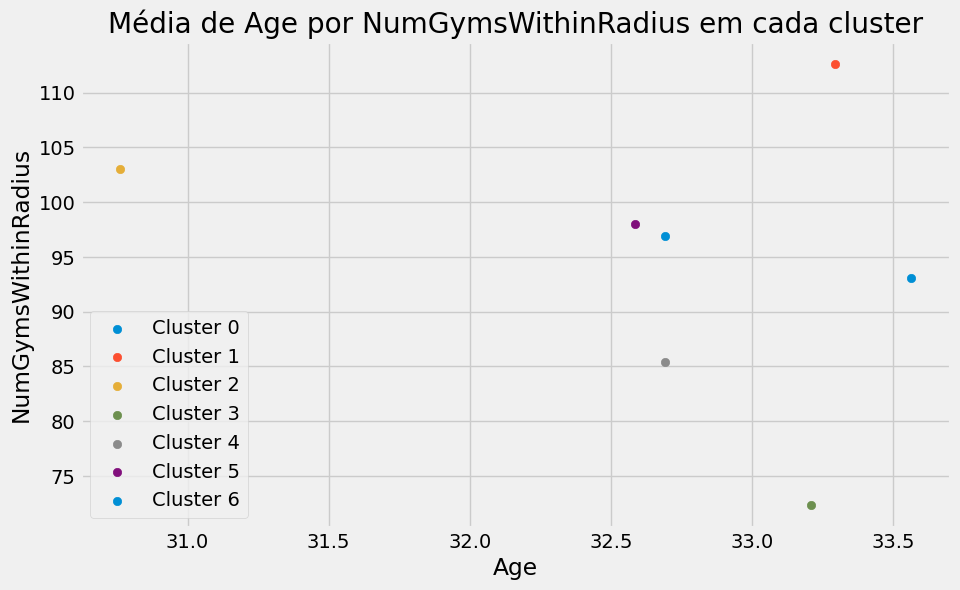

In [30]:
compare_columns('Age', 'NumGymsWithinRadius')

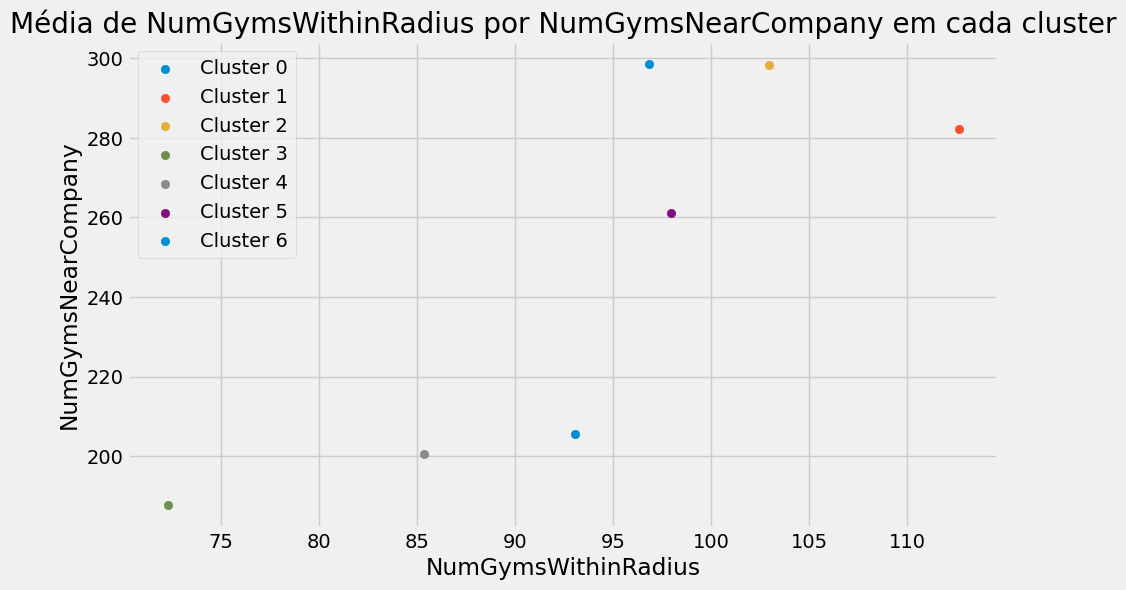

In [31]:
compare_columns('NumGymsWithinRadius', 'NumGymsNearCompany')	

# Segmentação dos Clientes

Segmentando os clientes em cada cluster para k=8:

In [32]:
df_final = df_filtrado
df_final = df_final.iloc[:,[0,1,2,3,8,9,10,11,13,14,16,17,18]] # 13 das 19 colunas
# Normalizando com standard scaler:
scaler = MinMaxScaler()
df_final_scaled = scaler.fit_transform(df_filtrado)
df_final_scaled

# K-Means Algorithm
#-------------------------------------------------------------------
K_min = 8
K_max = 8
n_init = 10
k_list=[]
algorithm_list=[]
inertia_list=[]
silhouette_list = []
cluster_centers_list=[]
# Perform the k-means algorithm for different values of k
for k in range(K_min,K_max+1):
    print('k = ' + str(k))
    k_list.append(k)
    # Apply k-means algorithm with n_init different initializations
    current_kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=0)
    current_kmeans.fit(df_final_scaled)
    # Store Objective Function (inertia: Sum of Squared Distances to Cluster Centers)
    inertia_list.append(current_kmeans.inertia_)
    # Store silhouette
    silhouette_list.append(silhouette_score(df_final_scaled, current_kmeans.labels_))
    # Store Cluster Centers
    cluster_centers_list.append(current_kmeans.cluster_centers_)
    # Store current algorithm
    algorithm_list.append(current_kmeans)

k = 8


In [52]:
# Criando uma tabela com employee_id e o cluster que ele pertence:
df_cluster = pd.DataFrame()
df_cluster['cluster'] = algorithm_list[0].labels_
df_cluster['employee_id'] = df['employee_id'].to_numpy()
df_cluster

,cluster,employee_id
0,0,59947
1,0,117495
2,0,81798
3,0,117496
4,0,32337
...,...,...
934494,2,2089535
934495,5,2060511
934496,6,2091031
934497,7,2091403


In [73]:
# Salvando df_cluster em um csv:
df_cluster.to_csv('../Tabelas/df_cluster.csv', index=False)